In [1]:
import os
import sys
import pandas as pd
import nltk
import numpy as np
from scipy.sparse import linalg

import newspaper

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn import decomposition
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn import exceptions
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from internal_displacement.scraper import Scraper
from internal_displacement.pipeline import Interpreter

import warnings
warnings.simplefilter(action = "ignore", category = exceptions.UndefinedMetricWarning)

In [5]:
scraper = Scraper()


In [22]:
df = pd.read_csv('../../article_contents.csv')

In [74]:
urls = df['url']

In [8]:
def check_language(article):
    '''Identify the language of the article content
    and update the article property 'language'
    Parameters
    ----------
    article:        the content of the article:String
    '''
    try:
        language = textacy.text_utils.detect_language(article)
    except ValueError:
        language = 'na'
    return language

In [11]:
def urls2paragraphs(urls):
    content = []
    for url in urls:
        a = newspaper.Article(url)
        a.download()
        if a.is_downloaded:
            a.parse()
            title = a.title
            text = a.text
            if check_language(text) != 'en':
                text = 'not english'
            texts = text.split('\n')
            texts = [t for t in texts if len(t) > 3]
            for text in texts:
                content.append((url, title, text))
        else:
            content.append((url, title, 'fail'))
    return pd.DataFrame(content, columns=['url', 'title', 'paragraph'])

In [17]:
df_input = pd.read_csv('../../data/input_urls.csv')

In [25]:
df_input_sample = df_input.iloc[:3000]

In [27]:
urls = df_input_sample['DocumentIdentifier']

In [28]:
df_urls = urls2paragraphs(urls)

Traceback (most recent call last):
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/newspaper/parsers.py", line 68, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/lxml/html/__init__.py", line 876, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/lxml/html/__init__.py", line 765, in document_fromstring
    "Document is empty")
lxml.etree.ParserError: Document is empty
Traceback (most recent call last):
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/newspaper/parsers.py", line 68, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/lxml/html/__init__.py", line 876, in fromstring


Traceback (most recent call last):
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/newspaper/parsers.py", line 68, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/lxml/html/__init__.py", line 876, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/lxml/html/__init__.py", line 765, in document_fromstring
    "Document is empty")
lxml.etree.ParserError: Document is empty
Traceback (most recent call last):
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/newspaper/parsers.py", line 68, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/lxml/html/__init__.py", line 876, in fromstring


Traceback (most recent call last):
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/newspaper/parsers.py", line 68, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/lxml/html/__init__.py", line 876, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/lxml/html/__init__.py", line 762, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "src/lxml/lxml.etree.pyx", line 3213, in lxml.etree.fromstring (src/lxml/lxml.etree.c:79010)
  File "src/lxml/parser.pxi", line 1848, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:118341)
  File "src/lxml/parser.pxi", line 1729, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:116899)
  File "src/lxml/parser.pxi", line 1063, in lxml.etree._BaseParser._p

Traceback (most recent call last):
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/newspaper/parsers.py", line 68, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/lxml/html/__init__.py", line 876, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/Users/George/miniconda3/envs/d4d-internal-displacement/lib/python3.6/site-packages/lxml/html/__init__.py", line 762, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "src/lxml/lxml.etree.pyx", line 3213, in lxml.etree.fromstring (src/lxml/lxml.etree.c:79010)
  File "src/lxml/parser.pxi", line 1848, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:118341)
  File "src/lxml/parser.pxi", line 1729, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:116899)
  File "src/lxml/parser.pxi", line 1063, in lxml.etree._BaseParser._p

In [30]:
urls = urls.unique()

In [32]:
import math

def aggregator(df, urls, agg=3):
    content = []
    for url in urls:
        df_temp = df[df['url'] == url]
        title = df_temp['title'].iloc[0]
        text = list(df_temp['paragraph'])
        text_groups = [text[agg*i:agg*i+agg] for i in range(0, math.ceil(len(text)/agg))]
        text = [' '.join(t) for t in text_groups]
        for t in text:
            content.append((url, title, t))
    return pd.DataFrame(content, columns=['url', 'title', 'paragraph'])


In [33]:
df_urls = aggregator(df_urls, urls)

In [36]:
df_urls.to_csv('../../data/input_urls_0_30k.csv', index_label='id')

# LSI

In [95]:
def prepare_data(df):
    df['meta_description'].fillna('', inplace=True)
    df['content'].fillna('', inplace=True)
    df['title'].fillna('', inplace=True)
    df['all_text'] = df['title'] + ' ' + df['meta_description'] + ' ' + df['content']
    
    tokenizer = nltk.tokenize.WordPunctTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    all_text = df['all_text'].apply(lambda x: tokenizer.tokenize(x))
    all_text = all_text.apply(lambda x: [lemmatizer.lemmatize(t) for t in x])
    all_text = all_text.apply(lambda x: ' '.join([t for t in x if not any(d.isdigit() for d in t)]))
    
    
    titles = df['title'].apply(lambda x: tokenizer.tokenize(x))
    titles = titles.apply(lambda x: [lemmatizer.lemmatize(t) for t in x])
    titles = titles.apply(lambda x: ' '.join([t for t in x if not any(d.isdigit() for d in t)]))
    
    df['tag'].map({'Conflict and violence': 'conflict', 'Disasters': 'disaster'})
    le = LabelEncoder()
    labels = le.fit_transform(df['tag'])
    return all_text, titles, labels, le

In [ ]:
def lsi_model(tfidf_text=None, svd_text=None, k=50, seed=42):
    tfidf = TfidfVectorizer(ngram_range=(1,4), stop_words='english')
    tfidf_model = tfidf.fit(tfidf)

In [96]:
train_text, train_titles, train_labels, le = prepare_data(df)

In [8]:
news = nltk.corpus.reuters
reuters_docs = [news.raw(n) for n in news.fileids()]

In [9]:
def remove_newline(text):
    ''' Removes new line and &nbsp characters.
    '''
    text = text.replace('\n', ' ')
    text = text.replace('\xa0', ' ')
    text = text.replace('\\', '')
    return text

for i, _ in enumerate(reuters_docs):
    reuters_docs[i] = remove_newline(reuters_docs[i])

In [10]:
for text in train_text:
    reuters_docs.append(text)

In [11]:
tfidf = TfidfVectorizer(ngram_range=(1,4), stop_words='english')
tfidf_reuters = tfidf.fit(reuters_docs)
#tfidf_train = tfidf.fit(train_text)

In [80]:
#train_text_tfidf = tfidf.transform(train_text)
train_titles_tfidf = tfidf.transform(train_titles)

In [163]:
reuters_tfids = tfidf.transform(train_titles)

In [100]:
train_titles_tfidf

<291x1990846 sparse matrix of type '<class 'numpy.float64'>'
	with 5255 stored elements in Compressed Sparse Row format>

In [35]:
svd = decomposition.TruncatedSVD(n_components=50)
#svd.fit(train_text_tfidf)
#svd.fit(train_titles_tfidf)
svd.fit(train_titles_tfidf)

TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0)

In [81]:
#train_text_svd = svd.transform(train_text_tfidf)
train_titles_svd = svd.transform(train_titles_tfidf)

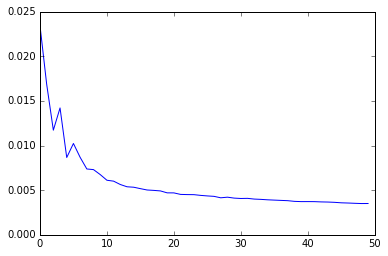

In [83]:
plt.plot(svd.explained_variance_)

In [78]:
param_grid = [{'kernel': ['linear'], 
              'gamma': [.01, .03, 0.1, 0.3, 1.0, 3.0],
              'class_weight':[{0:1,1:1}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:5}],
              'C': [1/x for x in [.003 , .01, .03, 0.1, 0.3, 1.0, 3.0, 10.0]]}]

scores = ['precision', 'recall']

svc = svm.SVC()
clf = model_selection.GridSearchCV(svc, param_grid=param_grid, cv=5, scoring='f1')

In [97]:
clf.fit(train_titles_svd, train_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0], 'C': [333.3333333333333, 100.0, 33.333333333333336, 10.0, 3.3333333333333335, 1.0, 0.3333333333333333, 0.1], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [98]:
clf.best_score_

0.97036773982857727

In [99]:
clf.best_params_

{'C': 10.0, 'class_weight': {0: 1, 1: 1}, 'gamma': 0.01, 'kernel': 'linear'}

In [100]:
best_clf = clf.best_estimator_

In [46]:
best_predictions = clf.predict(train_titles_svd)

In [201]:
target_names = ['Disasters', 'Conflict and violence']
print(classification_report(train_labels, best_predictions, target_names=target_names))

                       precision    recall  f1-score   support

            Disasters       0.99      0.94      0.96       260
Conflict and violence       0.65      0.90      0.76        31

          avg / total       0.95      0.94      0.94       291



# Export Model

Pickling these models can take a long time! Only do it if you really want a new one.

In [108]:
default_pipeline = make_pipeline(tfidf, svd, best_clf)

In [104]:
test_titles = ['INSIGHT-India-Pakistan clashes escalate into a humanitarian tragedy',
              'Afghanistan – Flash Floods in Faryab and Baghlan Leave 8 Dead']

test_results = default_pipeline.predict(test_titles)
le.inverse_transform(test_results)
print(test_results)


[0 1]


In [111]:
joblib.dump(le, '../../default_encoder.pkl', compress = 1)

['../../default_encoder.pkl']

In [113]:
joblib.dump(default_pipeline, '../../default_model.pkl', compress = 3)

['../../default_model.pkl']

# Learning Curves

In [202]:
train_sizes, train_scores, valid_scores = learning_curve(
    best_clf, train_text_svd, train_labels, train_sizes=[50, 60, 100, 150, 200, 231], cv=5)

In [203]:
train_scores = [np.mean(x) for x in train_scores]
valid_scores = [np.mean(x) for x in valid_scores]

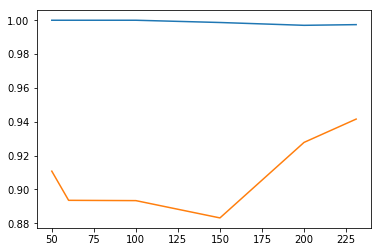

In [204]:
plt.plot(train_sizes, train_scores)
plt.plot(train_sizes, valid_scores)

# Testing

In [3]:
df_test = pd.read_csv('.csv')

FileNotFoundError: File b'../../data/article_contents2.csv' does not exist

In [186]:
df_test.head(1)

,Unnamed: 0,title,meta_description,content,url,tag
0,0,Islamist violence strains a poor nation's warm...,"DIFFA, Niger (Reuters) - Unlike many victims o...","DIFFA, Niger (Reuters) - Unlike many victims o...",http://www.thefiscaltimes.com/latestnews/2016/...,Conflict and violence


In [ ]:
drop 19, 20

In [187]:
df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [188]:
df_test.drop(19, inplace=True)
df_test.drop(20, inplace=True)

In [157]:
df_test.drop(20, inplace=True)

In [189]:
df_test.iloc[20]

title               UN to Place This Nation Under Scrutiny for Gha...
meta_description    Sudan's president, Omar al-Bashir, is the worl...
content             The Sudanese Church of Christ, Bahri, North Kh...
url                 http://www.charismanews.com/world/56936-un-to-...
tag                                             Conflict and violence
Name: 22, dtype: object

In [190]:
test_text, test_titles, test_labels = prepare_data(df_test)
test_labels.fillna(0, inplace=True)

In [191]:
test_text_tfidf = tfidf.transform(test_text)
test_text_svd = svd.transform(test_text_tfidf)

In [192]:
test_titles_tfidf = tfidf.transform(test_titles)
test_titles_svd = svd.transform(test_titles_tfidf)

In [205]:
predictions = best_clf.predict(test_titles_svd)

In [206]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0])

In [207]:
sum(predictions == test_labels)/len(test_labels)

0.60273972602739723

In [143]:
target_names = ['Disasters', 'Conflict and violence']
print(classification_report(test_labels, predictions, target_names=target_names))

                       precision    recall  f1-score   support

            Disasters       0.76      0.88      0.81        42
Conflict and violence       0.81      0.64      0.71        33

          avg / total       0.78      0.77      0.77        75



# Appendix 1 - Approaches

## Approach 1

0.59

1. Fit TfIdf on training data
2. Fit SVD on training data (k=200)
3. Transform training data with SVD
4. Optimise SVM classifier

```
precision    recall  f1-score   support

            Disasters       1.00      0.99      1.00       260
Conflict and violence       0.94      1.00      0.97        31

          avg / total       0.99      0.99      0.99       291
```          
5. Best classifier on test data

```
precision    recall  f1-score   support

            Disasters       0.58      1.00      0.74        42
Conflict and violence       1.00      0.09      0.17        33

          avg / total       0.77      0.60      0.49        75
```

## Approach 2

0.72

1. Fit TfIdf on Reuters corpus
2. Fit SVD on training data (k=100)
3. Transform training data with SVD
4. Optimise SVM classifier

```
                       precision    recall  f1-score   support

            Disasters       1.00      0.98      0.99       260
Conflict and violence       0.84      1.00      0.91        31

          avg / total       0.98      0.98      0.98       291
```          
5. Best classifier on test data

```
                       precision    recall  f1-score   support

            Disasters       0.67      0.98      0.80        42
Conflict and violence       0.93      0.39      0.55        33

          avg / total       0.78      0.72      0.69        75
```

## Approach 3

0.57

1. Fit TfIdf on Reuters corpus
2. Fit SVD on training data (k=50)
3. Transform training data with SVD
4. Optimise SVM classifier

```
                       precision    recall  f1-score   support

            Disasters       1.00      0.98      0.99       260
Conflict and violence       0.84      1.00      0.91        31

          avg / total       0.98      0.98      0.98       291
```          
5. Best classifier on test data

```
                       precision    recall  f1-score   support

            Disasters       0.67      0.98      0.80        42
Conflict and violence       0.93      0.39      0.55        33

          avg / total       0.78      0.72      0.69        75
```

## Approach 4

0.77

1. Fit TfIdf on Reuters corpus
2. Fit SVD on training titles (k=50)
3. Transform training data with SVD
4. Optimise SVM classifier

```
                       precision    recall  f1-score   support

            Disasters       1.00      0.98      0.99       260
Conflict and violence       0.88      0.97      0.92        31

          avg / total       0.98      0.98      0.98       291
```

5. Best classifier on test data

```
                       precision    recall  f1-score   support

            Disasters       0.57      0.93      0.71        42
Conflict and violence       0.57      0.12      0.20        33

          avg / total       0.57      0.57      0.49        75
```



# Scraping Test Set

In [4]:
scraper = Scraper()

In [36]:
def scrape_urls(urls):
    texts = []
    indices = []
    urls_done = []
    for i, url in enumerate(urls):
        try:
            article = scraper.scrape(url, scrape_pdfs=False)
            if article:
                text = article[0]
                urls_done.append(url)
                indices.append(i)
                texts.append(text)
                print(i)
            else:
                texts.append('pdf')
        except:
            texts.append('broken')
    return texts, indices, urls_done

In [26]:
test_urls = pd.read_csv('../../data/test/IDETECT_test_dataset - Tagging.csv')

In [28]:
urls = test_urls['url']

In [33]:
url_chunks = [urls[x:x+25] for x in range(0, len(urls), 25)]

In [37]:
texts, indices, urls_done = scrape_urls(urls)

1
3
4
5
7
8
9
12
15
16
17
19
20
21
22
23
25
26
27
29
30
32
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
50
51
53
54
55
56
57
58
59
60
62
63
64
65
66


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


67
68
69
70
71
72
75
77
78
79
80
84
85
86
87
88
89
90
94
95
97
98
101
104
105
106
107
108
109
110
112
113
114
115
118
119
121
122
123
125
126
127
129
130
131
132
133
134
136
137
138
139
140
141
142
144
145
147
148
149
150
151
153
154
155
159
162
164
165
168
169
170
171
172
173
174
176
177
178
179
180
182
184
185
186
187
188
189
191
192
193
195
196
197
198
199
201
202
203
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
229
230
231
232
233
234
235
236
237
239
240
241
242
243
244
245
246
247
248
249
250
252
253
254
255
258
259
260
261
262
264
265
267
268
269
270
271
273
274
275
277
279
281
289
293
294
295
296
299
301
302
303
304
306
307
308
309
310
311
312
313
314
315
317
318
320
321
323
324
325
327
328
329
330
331
332
333
336
337
338
340
342
343
344
347
348
349
350
351
352
354
356
357
358
359
360
361
362
364
365
366
367
368
369
370
371
373
374
375
376
377
378
379
380
381
382
383
385
386
387
389
391
392
393
394
395
397
398
400
402
403
404
405
406
407
408
409
410
41

In [43]:
d = {'texts':texts}
scraped_test_tags = pd.DataFrame(data=d)

In [50]:
urls[180]

'http://reliefweb.int/report/nicaragua/detallan-da-os-en-localidades-afectadas-por-sismos'

In [55]:
scraped = test_urls.iloc[indices]

In [57]:
scraped.iloc[180]

url_id                                                  242
url       http://erccportal.jrc.ec.europa.eu/ECHO-Flash/...
Name: 241, dtype: object

In [52]:
scraped_test_tags[scraped_test_tags['texts'].str.contains('failed')]

,texts
180,retrieval_failed
182,retrieval_failed
184,retrieval_failed
185,retrieval_failed
186,retrieval_failed
187,retrieval_failed
188,retrieval_failed
189,retrieval_failed
191,retrieval_failed
192,retrieval_failed
